## A Taster to the Juxtorpus

This notebook showcases some usages of the ATAP Juxtorpus tool, which includes two major components: **Corpus** and **Jux**. 
The **Corpus** package enables the user to upload, select and build their texts as a Corpus object. The Corpus can then be explored and sliced flexibly into sub-corpus based on various metadata or text patterns within the contents. Several out-of-box tools and visualisations come with the Corpus object so that the user can quickly explore the Corpus and sub-Corpus in a unified manner, and more functions will be developed for similar purposes.

The **Jux** package, on the other hand, is a simpler tool designed to compare and identify the contrasts between a pair of corpora. Although the comparison sounds like a simple task, when this is conducted on corpora refined with specific conditions and using different metrics of comparison, a lot of insights could be extracted from the analysis.

Besides the two new packages to the ATAP text analytic tool suite, this notebook will also demostrate how to integrate other ATAP tools together with the corpus in order to create a reuseable workflow for your research, these include _Concordance Tool_, _Quotations Tool_, _Semantic Tagger_, _Text Similarity Scorer_ etc.

Interactive Widgets were developed for several common functions to make the operations easier for people without technical backgrounds, and this notebook demonstrate both method if a widget is available for the operation.

<div class="alert alert-block alert-warning">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>



In [1]:
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
.jp-icon-warn0 path {fill: var(--jp-warn-color0);} \
.bp3-button-text path { fill: var(--jp-inverse-layout-color3);} \
.jp-icon-brand0 path { fill: var(--jp-brand-color0);} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))

In [7]:
import os
while 'juxtorpus' not in os.listdir():
    os.chdir('../')
# if  not 'juxtorpus' in os.listdir():
#     os.chdir('../../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

# imports
import pandas as pd
from pathlib import Path
import spacy
from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
from juxtorpus.corpus.topic_model import LDA
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus.corpus.corpora import Corpora

import warnings
warnings.filterwarnings('ignore')

from atap_widgets.concordance import ConcordanceTable, ConcordanceWidget, ConcordanceLoader
from atap_widgets.concordance import prepare_text_df


In [7]:
!pip install git+https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git@a93db3674590320bf5de61748641c20d05fb9c9f

  Cloning https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git (to revision a93db3674590320bf5de61748641c20d05fb9c9f) to /private/var/folders/1n/ynr0l5x95gx628r7xsnmn9c40000gq/T/pip-req-build-pqy6at4d
  Running command git clone --filter=blob:none --quiet https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git /private/var/folders/1n/ynr0l5x95gx628r7xsnmn9c40000gq/T/pip-req-build-pqy6at4d
  Running command git rev-parse -q --verify 'sha^a93db3674590320bf5de61748641c20d05fb9c9f'
  Running command git fetch -q https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git a93db3674590320bf5de61748641c20d05fb9c9f
  Running command git checkout -q a93db3674590320bf5de61748641c20d05fb9c9f
  Resolved https://github.com/Australian-Text-Analytics-Platform/atap_widgets.git to commit a93db3674590320bf5de61748641c20d05fb9c9f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... don

# 1. Corpus Building and Exploration

#### The **Corpus** package is the essential platform for text operations and explorations. Users can upload or link their text collections with associated metadata, then compile the selected texts as a *Corpus* object. A *Corpus* object consists of a number of *documents* and the metadata that describe the documents, such as *title*, *publish date*, *author*, *word count* etc.
#### A corpus can be built with either codes or an interactive widget within this notebook. When the input data are in the format of a spreadsheet, each row of data will be come one document. The user needs to specify the column for the text contents, and all other columns are compiled as associating metadata. The data type, e.g. *numeric*, *text*, *datetime*, *category*, need to be determined on the corpus building, and this affects how each meta data can be used in the further slicing operations.
#### Once a corpus is built, the user is provided some basic out-of-box tools to explore the text contents or metadata, such as generating a word frequency table, plotting a word cloud, create a timeline plot of the documents or certain patterns in the text, or to perform certain analysis on the corpus with either ATAP or external tools, e.g. running *concordance tool*, *quotation tool* or *LDA topic modelling* etc.
### The following section will demonstrate how to upload your text, build a corpus and explore it's contents.

## 1.1 Upload your text and build a Corpus with corpus.widget()

#### The **Corpora()** creates a corpus container that holds many Corpus objects. Each corpus can be built and named within the builder widget after the text contents are uploaded. Once the column of text is selected, and the data type of each meta data is set, the user can name the corpus and click on the button **Build**. If no name is manually given, a random name will be given to the corpus.

In [8]:
corpora = Corpora()
corpora.widget()

In [11]:
corpora['CS'].viz.wordcloud(stopwords=['https', 'americanair'])

TypeError: wordcloud() got an unexpected keyword argument 'stopwords'

In [3]:
use_cols = ['id', 'created_at', 'source', 'location', 'text', 'retweet_count', 'lang', 'possibly_sensitive', 'tweet_type']
dtypes = ['Int64', 'category', 'string', 'Int64', 'category', 'category', 'category']

df = pd.read_csv(Path('./notebooks/demos/Sample_Auspol_Tweets_Full.csv'), 
                 usecols=use_cols, 
                 dtype={'id': 'Int64', 'source': 'category', 'location':str, 'text':str, 'retweet_count':int, 'lang': 'category', 'tweet_type': 'category'})
df['created_at'] = pd.to_datetime(df['created_at'])
#corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
corpus = Corpus.from_dataframe(df, col_doc='text', name='auspol')

corpus.name

'auspol'

In [9]:
use_cols = ['author_id', 'inbound', 'created_at', 'text', 'in_response_to_tweet_id', 'company', 'conversation']
# dtypes = ['Int64', 'category', 'string', 'string', 'Int64', 'Int64', 'category', 'category']

df = pd.read_csv(Path('./notebooks/demos/taster_workshop/twcs_sel.csv'),
                 usecols=use_cols, 
                 dtype={'author_id': str,
                        'inbound': 'category',
                        'created_at': str,
                        'text':str,
                        'in_response_tweet_id': 'Int64',
                        'company': 'category', 
                        'conversation': 'category'})

df['created_at'] = pd.to_datetime(df['created_at'])
# #corpus = process(Corpus.from_dataframe(df, col_doc='text', name='auspol'), nlp=spacy.blank('en'))
corpus = Corpus.from_dataframe(df, col_doc='text', name='CS')
corpora.add(corpus)

In [10]:
temp = corpus.slicer.filter_by_item('inbound', 'True')
AA_C = temp.slicer.filter_by_item('company', 'americanair')
AA_C.name = 'AA_C'
BA_C = temp.slicer.filter_by_item('company', 'british_airways')
BA_C.name = 'BA_C'
corpora.add(AA_C)
corpora.add(BA_C)
corpora.items()

['CS', 'AA_C', 'BA_C']

In [27]:
MAX_WORDS = 100
TYPE = 'word'
#TYPE = 'hashtag'
# TYPE = 'mention'
corpora['AA_C'].viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

TypeError: wordcloud() got an unexpected keyword argument 'stopwords'

In [17]:
supported_gradate_colours()

NameError: name 'supported_gradate_colours' is not defined

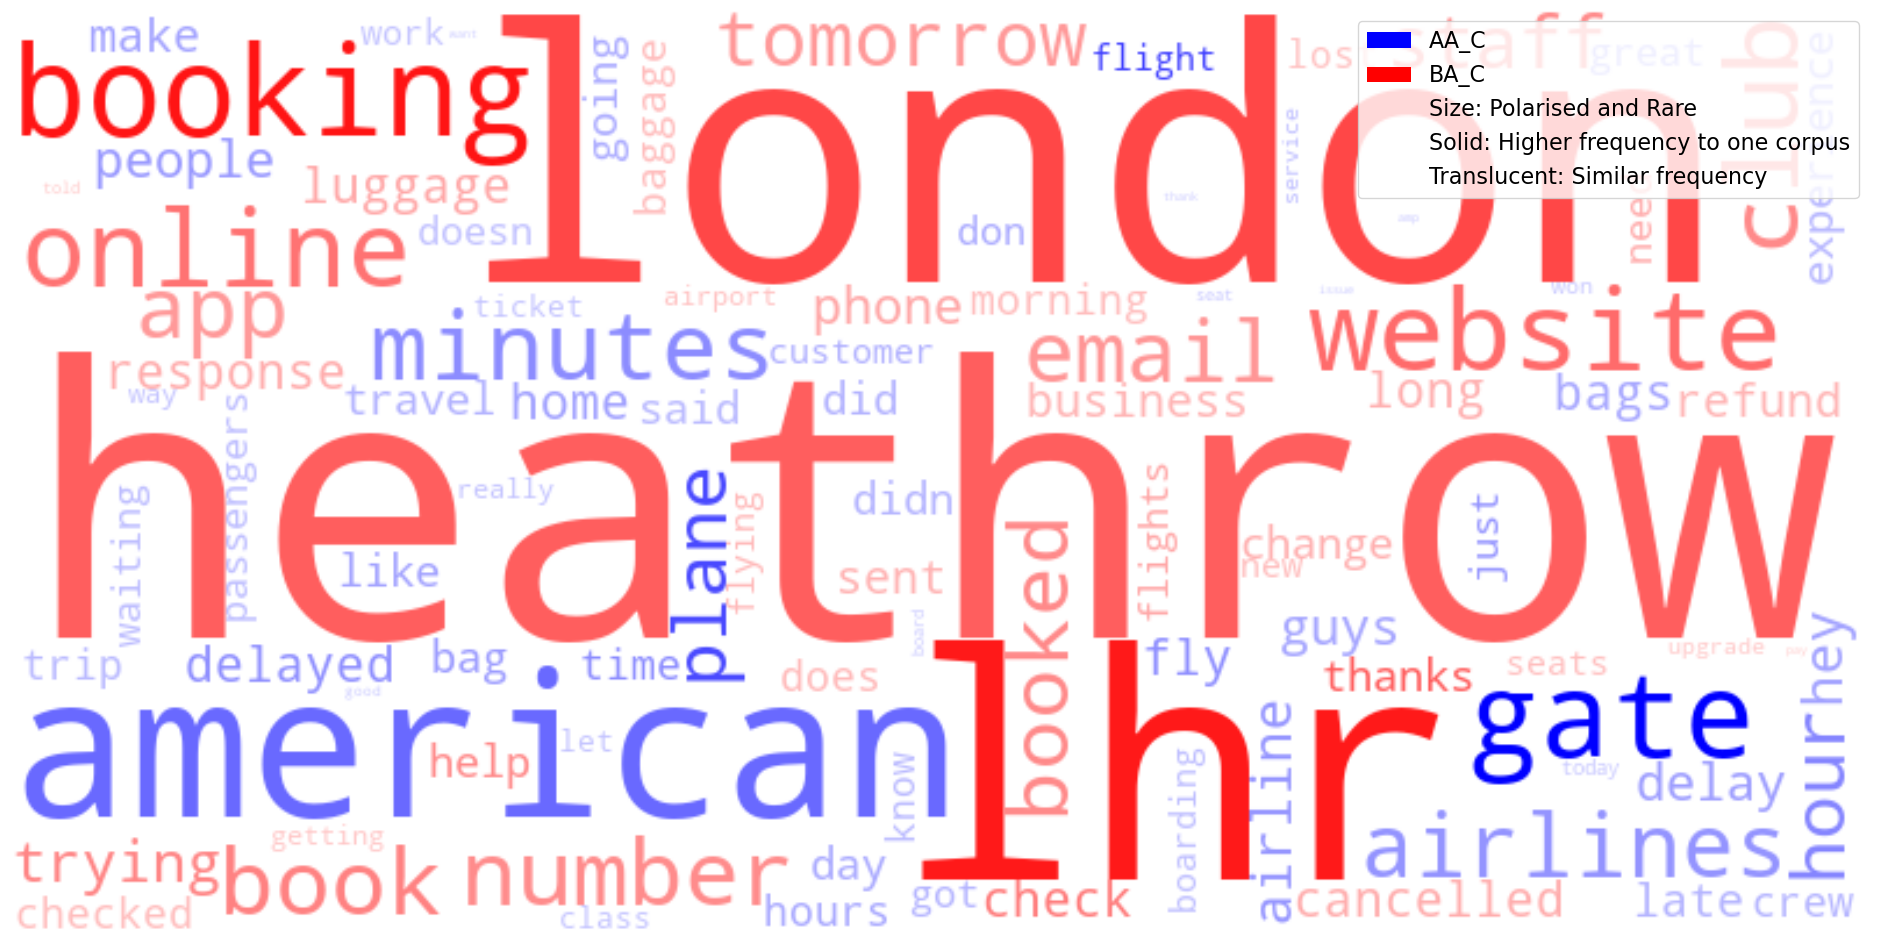

In [23]:
from juxtorpus import Jux

jux = Jux(corpora['AA_C'], corpora['BA_C'])
stop_words = ['americanair', 'british_airways']
jux.polarity.wordcloud(metric='tf', top=100, colours=('blue', 'red'), stopwords=stop_words)  # change this to 'tfidf' or 'log_likelihood'

In [17]:
subcorpus = corpora['customer-service'].slicer.filter_by_item('company', 'british_airways')
subcorpus.summary()

RuntimeError: [RuntimeError('Failed to clone DTM.'), IndexError('index (2987877) out of range')]

In [18]:
corpora['auspol'].slicer.filter_by_item('tweet_type', 'original')

In [8]:
df2 = corpus.to_dataframe()
df2.to_csv('./notebooks/demos/taster_workshop/twcs_sel2.csv')

In [13]:

corpora.widget()

In [11]:
from timeit import default_timer as timer

start = timer()

DataCSV = ConcordanceLoader(type='dataframe', df_input=df)
DataCSV.show()

end = timer()
print(end - start)

124.31303654203657


In [10]:
from timeit import default_timer as timer
#corpus = Corpus.from_dataframe(df, col_doc='text', name='auspol-plain')
start = timer()

DataCSV = ConcordanceLoader(type='corpus', df_input=corpora['test2'])
DataCSV.show()

end = timer()
print(end - start)

1.0160403330228291


In [ ]:
corpus.summary()

In [ ]:
# Alternatively, a corpus can be built with the code and added to the corpora container.
# corpora.add(corpus)   # alternatively


In [ ]:
df.columns

## Exploring the Corpus

In [ ]:
corpus = corpora['auspol']
print('This table summarise the basic information of the corpus')
corpus.summary()

### Corpus Wordcloud

In [ ]:
MAX_WORDS = 100
TYPE = 'word'
# TYPE = 'hashtag'
# TYPE = 'mention'
print('Generate a word cloud with one line of code')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

In [ ]:
MAX_WORDS = 100
# TYPE = 'word'
TYPE = 'hashtag'
# TYPE = 'mention'
print('Or make a wordcloud focusing on another predefined pattern - Hashtag')
corpus.viz.wordcloud(max_words=MAX_WORDS, word_type=TYPE)

### A Timeline of Daily Tweets Number

In [ ]:
# FREQ = '1w'
# FREQ = '1m'
FREQ = '1d'
COL_TIME = 'created_at'
corpus.viz.timeline(COL_TIME, freq=FREQ)

In [ ]:
print('Can also aggregate the data by different periods, e.g. weekly tweeting numbers')
corpus.viz.timeline(COL_TIME, freq='1w')

In [ ]:
COL_TIME = 'created_at'
FREQ = '1w'

# user defined function in creating a custom dtm (document-term-matrix)
matcher = is_hashtag(corpus.nlp.vocab)
def extract_hashtags(doc): return [doc[s:e].text.lower() for _, s, e in matcher(doc)]
corpus.create_custom_dtm(extract_hashtags)

print('Extract all Hashtags and display their weekly trends\n - Click legend to deselect items\n - Use the search box to display specific hashtag')
item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, custom_dtm=True)
item_timeline.render()

# Corpus Slicer - creating a subcorpus

## Slice the corpus by categorical metadata - Single or Multiple Choices

In [ ]:
temp_corpus = corpora['auspol'].slicer.filter_by_item('lang', 'en')
temp_corpus.name = 'auspol-en'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_item('source', ['Twitter for iPad', 'Twitter for iPhone', 'Twitter for Mac'])
temp_corpus.name = 'Apple'
corpora.add(temp_corpus)

## Slice the corpus by time

In [ ]:
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/03/2022', end='01/06/2022')
temp_corpus.name = 'Autumn22'
corpora.add(temp_corpus)
#
temp_corpus = corpora['auspol-en'].slicer.filter_by_datetime('created_at', start='01/09/2021', end='01/12/2021')
temp_corpus.name = 'Spring21'
corpora.add(temp_corpus)

## Slice the corpus by conditions, customised functions or slice the sub-corpora


In [ ]:
import re
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('retweet_count', lambda cnt: cnt>3)
temp_corpus.name = 'rt5+'
corpora.add(temp_corpus)
#
L_func = '''lambda x: re.match(r'^.*android.*$', x, re.IGNORECASE) is not None'''
temp_corpus = corpora['auspol-en'].slicer.filter_by_condition('source', eval(L_func))
temp_corpus.name = 'Android'
corpora.add(temp_corpus)

## Interactive Widget for Slicing the Corpora

In [ ]:
corpora.widget()

# Text Analysis on Corpus

### All exploration can be easily repeated on sub-corpus, e.g. Wordcloud

In [ ]:
corpora['Autumn22'].viz.wordcloud(max_words=MAX_WORDS, word_type='word')

## LDA Topic Modelling + merge the outcome back to corpus

In [ ]:
NUM_TOPICS = 10
lda = LDA(corpora['Autumn22'], num_topics=NUM_TOPICS).build('tf')
lda.add_results_to_corpus()
lda.widget()

### Create sub-corpus based on the topic model associations

In [ ]:
sel_topics = {'a': 4,
             'b': 10}
for t, n in sel_topics.items():
    temp_corpus = corpora['Autumn22'].slicer.filter_by_range('#lda_topic_{}'.format(n), min_=0.5)
    temp_corpus.name = 'Autumn_T'+t
    corpora.add(temp_corpus)

## Daily trends of the selected topics

In [ ]:
COL_TIME = 'created_at'
FREQ = '1d'
timelines(corpora, ['Autumn_Ta', 'Autumn_Tb'], COL_TIME, FREQ)

# Jux - Compare and highlight the contrasts between any pair of corpora

## Normal Corpus Wordcloud - Side by side, TFIDF

In [ ]:
MAX_WORDS = 50
# METRIC = 'tf'
METRIC = 'tfidf'
wordclouds(corpora, ['Autumn22', 'Spring21'], max_words=MAX_WORDS, metric=METRIC)

## Jux Polarity Wordcloud - term frequency

In [ ]:
METRIC = 'tf'
# METRIC = 'tfidf'
# METRIC = 'log_likelihood'
TOP = 80
jux_season = Jux(corpora['Autumn22'], corpora['Spring21'])
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'))

### User defined tokenising function

In [ ]:
METRIC = 'tf'

# getting hashtags using a user defined function
jux_season.polarity.wordcloud(METRIC, top=TOP, colours=('blue', 'red'), tokeniser_func=extract_hashtags)

In [ ]:
colours = ('cyan', 'magenta')
jux_platform = Jux(corpora['Apple'], corpora['Android'])
jux_platform.polarity.wordcloud('tf', top=TOP, colours=colours)

# Keyword Analysis based on Log Likelihood

Future plans: using Log likelihood to analyse keywords (currently being integrated)


Rayson Paul., Berridge D. and Francis B. (2004). Extending the Cochran rule for the comparison of word frequencies between corpora. In Volume II of Purnelle G., Fairon C., Dister A. (eds.) Le poids des mots: Proceedings of the 7th International Conference on Statistical analysis of textual data (JADT 2004), Louvain-la-Neuve, Belgium, March 10-12, 2004, Presses universitaires de Louvain, pp. 926 - 936. ISBN 2-930344-50-4.
https://ucrel.lancs.ac.uk/llwizard.html

In [ ]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

jun_ft = corpora['Spring21'].dtm.freq_table().series
jan_ft = corpora['Autumn22'].dtm.freq_table().series
df_ft = pd.concat([jun_ft.rename('Spring21'), jan_ft.rename('Autumn22')], axis=1, join='outer').fillna(0)
colour = df_ft['Spring21'] > df_ft['Autumn22']

In [ ]:
llv = Jux(corpora['Spring21'], corpora['Autumn22']) \
    .stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:30].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

# Red - Overused in January Corpus, Blue - Overused in July Corpus

# Closing

+ Release is planned tentatively in **May**.
+ We will eventually integrate the ATAP tools together so you can easily access it under Corpus.
+ Stay tuned at https://www.atap.edu.au/
+ Feedback Survey at the end of the full workshop.
+ Questions - I'll be around or email me at huen.chan@sydney.edu.au